# <center> Econ 390: Computational Economics (with Python) </center>
## <center> Dr. Yaroslav Rosokha</center>

# Data Visualization in Python

## Contents
- [Motivating Example](#motivation)
 - [Anscombe's Quartet](#anscombe)
- [Data Visualization](#visualization-rules)
 - [Chart Message](#message)
- [Matplotlib](#matplotlib)
 - [Basic Chart Types](#charts)
- [Advanced Visualization in Python](#advanced)
 - [seaborn](#seaborn)

## Resources
- [Matplotlib](https://python-programming.quantecon.org/matplotlib.html#Matplotlib)
- More on matplotlib
    - [pyplot](https://matplotlib.org/3.3.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
    - [spans](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py)
    - [legends](https://matplotlib.org/3.3.1/tutorials/intermediate/legend_guide.html)
    
- More on [seaborn](https://seaborn.pydata.org/tutorial.html)


In [ ]:
#Libraries that we have covered before that are used in this notebook
import pandas as pd

<a id="motivation"></a>
# Data Visualization Motivation

<a id="anscombe"></a>
**Anscombe's quartet** comprises four data sets that have similar descriptive statistics, yet very different distributions

In [ ]:
import seaborn as sns #Load seaborn library
anscombe = sns.load_dataset("anscombe") #Load the dataset. This particular data set is built into sns library
dataLables=['I',"II","III","IV"]
for d in dataLables:
    print("-"*30)
    print("Dataset:",d)
    tempData=anscombe[anscombe.dataset==d]
    meanX = tempData.x.mean()
    meanY = tempData.y.mean()
    print("Mean of x:",meanX)
    print("Mean of y:",meanY)
    stdX = tempData.x.std()
    stdY = tempData.y.std()
    print("Std of x:",stdX)
    print("Std of y:",stdY)
    slope, intercept, r_value, p_value, std_err = stats.linregress(tempData.x,tempData.y)
    print("Correlation:",np.corrcoef(tempData.x,tempData.y)[0][1])    
    print("Slope of Regression:",round(slope,2))

In [ ]:
# FacetGrid is a tool in seaborn to display multiple plots considitional on a particular varialbe
g = sns.FacetGrid(anscombe, col="dataset")
g = g.map(plt.scatter, "x","y") # .map() for seaborn maps the function (in this case plt.scatter) to the facetted object
g = sns.FacetGrid(anscombe, col="dataset")
g = g.map(sns.regplot, "x","y") # another example in which the function is sns.regplot

<a id="visulaization-rules"></a>
# Data Visualization

## ["Ten Simple Rules for Better Figures"](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) 
    by Rougier, Droettboom, Bourne (2014)

1. Know your audience
2. Identify your message
3. Adapt the Figure to the Medium
4. Captions are not optional
5. Do not trust the defaults
6. Use color effectively
7. Do not mislead the reader
8. Avoid “Chartjunk”
9. Message Trumps Beauty
10. Get the right tool


<a id="message"></a>
## Chart Message
- Distribution
 - Histograms 
 - Bar Charts
 - Box Plots
 - Violin Plots
- Relationship
 - Line Plots 
 - Scatter Plots 
 - Bubble Plots 
 - Heat Maps
- Composition
 - Pie Chart
 - Stacked Bar Charts
- Comparison
 - Any of the above usually side by side or on the same graph


<a id="matplotlib"></a>
# Matplotlib

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. Many of python other visualization libraries build on top of matplotlib

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline 

<a id="charts"></a>
## [Line Plots](#https://medium.com/towards-artificial-intelligence/matplotlib-complete-beginners-guide-to-line-plots-a436e18d69e4)

In [ ]:
x = [0, 1, 4]
y = [0, 2, 3]
plt.plot(x,y)
plt.show()

## [Scatter Plot](#https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

In [ ]:
# Basic scatter plot
data = pd.read_csv('CarsData.csv') # Import cars data
plt.scatter(data.horsepower, data.mpg)
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

## [Histogram](#https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)

In [ ]:
# Basic histogram of the mpg
plt.hist(data.mpg)
plt.xlabel('Miles Per Galon')
plt.ylabel('Count')
plt.show()

## [Pie Chart](#https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [ ]:
# Basic pie chart
labs = ['Python', 'C++', 'Ruby', 'Java'] #data
sizes = [215, 130, 245, 210] #data
plt.pie(sizes, labels=labs)
plt.show()

# Motivation: Replicate US GDP Time Series Graph

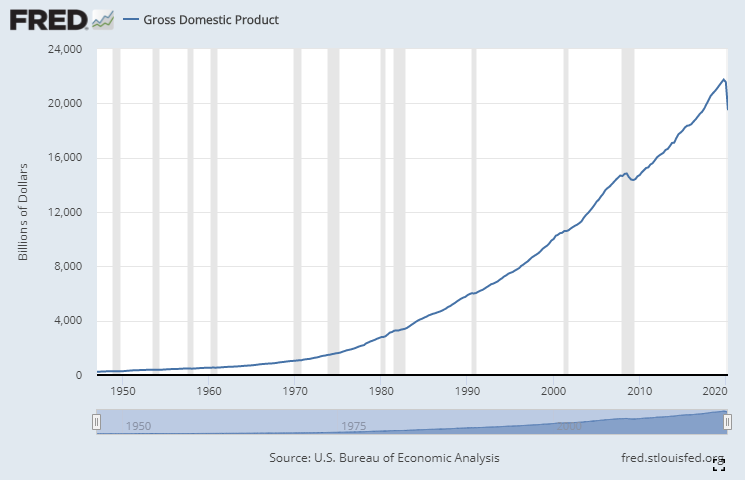

## Identify Figure Components
- main graph: [**plot**](https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)
- vertical shaded gray regions: [**axhspan**](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py)
- legends: [**legend**](https://matplotlib.org/tutorials/intermediate/legend_guide.html)
- x,y axis
    - spacing
    - values
    - titles
- [**subplot**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- filled area between lines: [**fill_between**](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html)

## Recall: Pandas Datetime

In [ ]:
gdp = pd.read_csv("FRED_GDP.csv")
gdp['DATE']=pd.to_datetime(gdp['DATE'])
gdp.set_index('DATE',inplace=True)
gdp.head()

In [ ]:
gdp.plot()
plt.show()

##### Practice Problem

Using a simplified definition of a recession (below), determine when the country was in a recession. Create a column in the data containing True/False denoting each quarter the country was in a recession.

> A **recession** refers to a significant decline in general economic activity in a designated region. 

A simplified definition  of a recession is two consecutive quarters of economic decline. The actual definition is determined/tracked by *The National Bureau of Economic Research (NBER)*.

In [ ]:
gdp['GDP_t-1']=gdp['GDP'].shift(1)
gdp['decline']=gdp['GDP_t-1']-gdp['GDP']
gdp['decline2']=gdp['decline'].shift()
gdp['recession']= (gdp['decline']>0) & (gdp['decline2']>0)
gdp['recession2']= gdp['recession'].shift(-1) #update: also include the other of two consecutive quarters
gdp.head(5)

## Subplots

In [ ]:
unemp = pd.read_csv('UNRATE.csv',parse_dates=['DATE']) #pandas can read in dates at the loading stage
unemp.set_index('DATE',inplace=True) #set date as index
print(unemp.head())
unemp.plot()
plt.show()

In [ ]:
# plot it
f, (a0, a1) = plt.subplots(2, 1, figsize=(15,7))
a0.plot(gdp.index,gdp['GDP'])
a1.plot(unemp.index,unemp['UNRATE'],color='red')
plt.show()

## Shaded Gray Regions

In [ ]:
gdp['end']=gdp.index
gdp['start']=gdp['end'].shift(1) #update: switched starts and ends
starts = gdp.start[(gdp['recession']==True) | (gdp['recession2']==True)]
ends = gdp.end[(gdp['recession']==True) | (gdp['recession2']==True)]

gdp.head()

In [ ]:
starts

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) # fig is the reference to the figure object, ax is the reference to the axes object
gdp.plot(y='GDP',ax=ax)

n = len(starts)

for i in range(1,n):
    
    ax.axvspan(starts[i],ends[i], facecolor='pink')

plt.show() #note: the difference from the graph from FRED is that we are using a simplified definition of the recession
            #in the hw you will use the data from NBER to obtain recession dates

## Shaded Under/Over Graph

In [ ]:
ax.fill_between?

In [ ]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
y1 = [1,2,3,4,5]
y2 = [1,4,9,16,25]
y3 = [2,4,6,8,10]

ax.plot(x,y1,'blue')
ax.plot(x,y2,'red')
ax.plot(x,y3,'green')

ax.fill_between(x,y2,0,color='pink')
ax.fill_between(x,y1,y3,color='gray')

plt.show()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(gdp.index, 0, gdp.GDP)
ax1.set_ylabel('between 0 and GPD')

ax2.fill_between(gdp.index, 0, 1,color='lightgreen')
ax2.set_ylabel('between y=0 and y=1')

ax3.fill_between(gdp.index, gdp.GDP, gdp.GDP/2,color='red')
ax3.set_ylabel('between GDP and GDP/2')
ax3.set_xlabel('x')

## Legends

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(gdp.index, gdp.GDP, label='GDP')
ax.plot(gdp.index, gdp.GDP/2, label='GDP/2')
plt.title('Legend inside')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(gdp.index, gdp.GDP, label='GDP')
ax.plot(gdp.index, gdp.GDP/2, label='GDP/2')
plt.title('Legend inside')

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.9), shadow=True, ncol=1)

plt.show()

## Axes

In [ ]:
fig, ax = plt.subplots()
x = [0, 1, 4]
y = [0, 2, 3]
positions = (0, 1, 4)
labels = ("A", "B", "C")
plt.xticks(positions, labels)
ax.plot(x, y,'o')
plt.show()

## Saving figure to file

> **savefig()** -- save figure to file. The file format can be specified by the extension.

In [ ]:
fig, ax = plt.subplots()
x = [0, 1, 4]
y = [0, 2, 3]
positions = (0, 1, 4)
labels = ("A", "B", "C")
plt.xticks(positions, labels)
ax.plot(x, y,'o')
plt.savefig("test.pdf")
plt.show()

<a id="advanced"></a>
# Advanced Data Visualization

Aside: If needed you can install a library you can do it from Anaconda Navigator or from the command prompt. 
- To install from the main repository you will need to run **conda install library_name**. 
- Sometime you may need to install libraries from conda forge repository. In this case you will need to run **conda install library_name -c conda-forge**.
- To keep track of the version you are using you can access the version with \_\__version\_\__ attribute

<a id="seaborn"></a>
## seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. See [Introductory Notes](https://seaborn.pydata.org/introduction.html) for more details on seaborn.

## Why seaborn?

- *It is data oriented* -- plotting functions operate on dataframes. 
- All the necessary syntax, mappings, and statistical operations are done behind the scenes.
- Easy to explore and understand data with few commands

In [ ]:
import seaborn as sns
print("seaborn version - %s" % sns.__version__) #The latest version is 0.11.0

In [ ]:
cars = pd.read_csv('CarsData.csv') # Import cars data
cars.head()

In [ ]:
sns.displot(cars['mpg'])

In [ ]:
sns.scatterplot(data=cars, x="horsepower", y="mpg")

## More Complicated Plots

In [ ]:
sns.regplot(data=cars, x="horsepower", y="mpg")

In [ ]:
sns.jointplot(data=cars, x="horsepower", y="mpg")

In [ ]:
sns.pairplot(data=cars)

## Customizing Seaborn  Plots

In [ ]:
sns.pairplot(data=cars, hue="origin")

In [ ]:
g = sns.pairplot(data=cars, vars=["acceleration", "horsepower","mpg"], markers=["o", "s", "D"], hue="origin")

### PairGrid

[PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html?highlight=pairgrid#seaborn.PairGrid) is used to create subplot grid for plotting pairwise relationships in a dataset

In [ ]:
g = sns.PairGrid(cars, vars=["acceleration", "horsepower","mpg"])
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot)

##### Practice Problem

Visualize the Titanic survival rate as a barplot. Break down the survival by class and gender.

In [ ]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

In [ ]:
sns.barplot(data=titanic, x="sex", y="survived", hue="class")

In [ ]:
titanic['class']=titanic['class'].astype('category')
titanic['class'].cat.reorder_categories(['First', 'Second','Third'], inplace=True)

In [ ]:
sns.barplot(data=titanic, x="sex", y="survived", hue="class")